In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr, chi2_contingency # Corrected import statement


warnings.filterwarnings('ignore')

In [ ]:
# import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
numeric_col = df.select_dtypes(include=np.number).columns
numeric_col

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [ ]:
len(numeric_col)

7

In [ ]:
len(df.columns)

12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum() #no null values

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum() #no duplicated values

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape #same as original dataset

(918, 12)

**EDA**

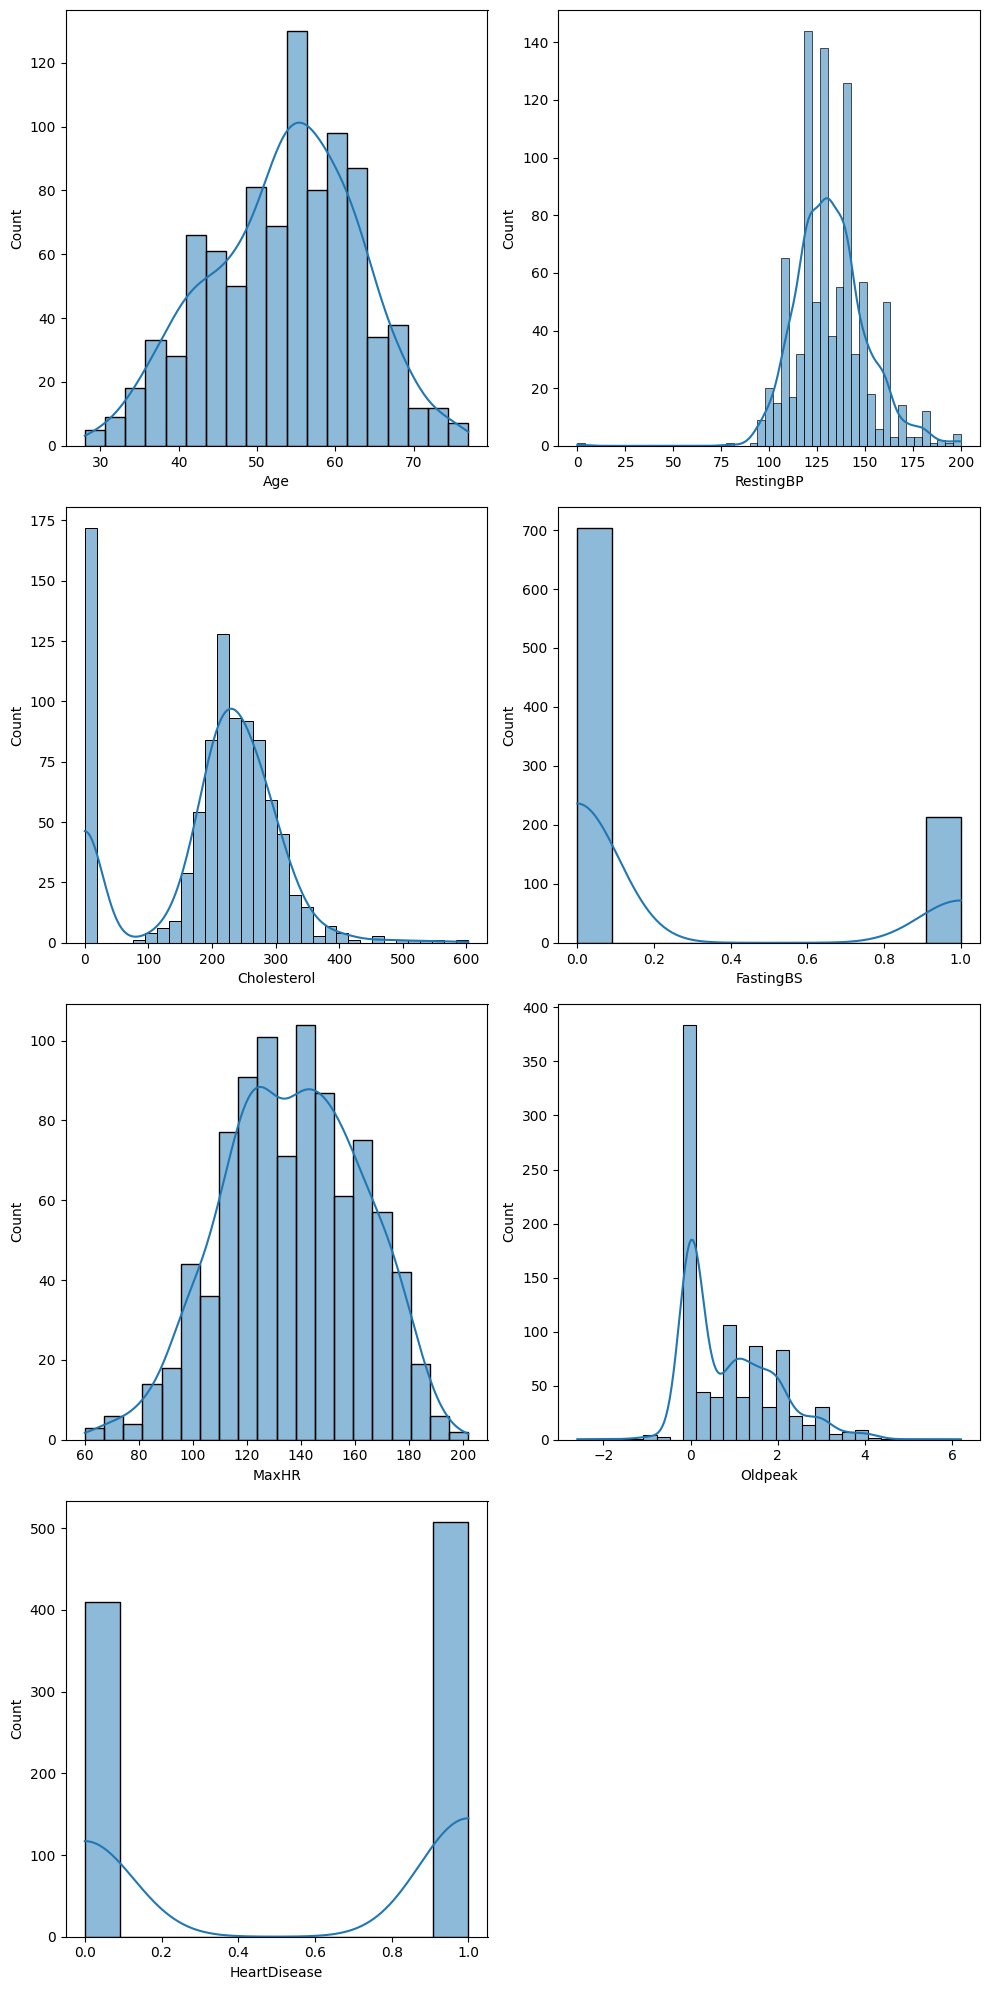

In [ ]:
plt.figure(figsize=(10,20))
for i, col in enumerate(numeric_col):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col],kde=True)
plt.tight_layout()
plt.show()

#Resting BP cannot be 0.
#Cholesterol cannot be 0.
#Fasting BS is ranging from 0-1.
#Heart disease Y/N is almost equally distributed, thus balance is maintained.

In [ ]:
# Cleaning cholesterol column

df['Cholesterol'].value_counts() #172 persons with 0 cholesterol

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
cholesterol_mean = df[df['Cholesterol'] != 0]['Cholesterol'].mean()
cholesterol_mean.item()

244.6353887399464

In [ ]:
df['Cholesterol']=df['Cholesterol'].replace(0,cholesterol_mean.item())
df['Cholesterol']=df['Cholesterol'].round(2).astype(int)

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
244,176
254,11
223,10
220,10
211,9
...,...
353,1
278,1
157,1


In [ ]:
# Cleaning Resting BP column

df['RestingBP'].value_counts().sort_values(ascending=True)

,count
RestingBP,
101,1
174,1
117,1
96,1
127,1
...,...
150,55
110,58
140,107


In [ ]:
RestingBP_mean = df[df['RestingBP'] != 0]['RestingBP'].mean()
RestingBP_mean.item()

df['RestingBP']=df['RestingBP'].replace(0,RestingBP_mean.item())


In [ ]:
df['RestingBP'].value_counts().sort_values(ascending=True)

,count
RestingBP,
101.0,1
174.0,1
117.0,1
96.0,1
127.0,1
...,...
150.0,55
110.0,58
140.0,107


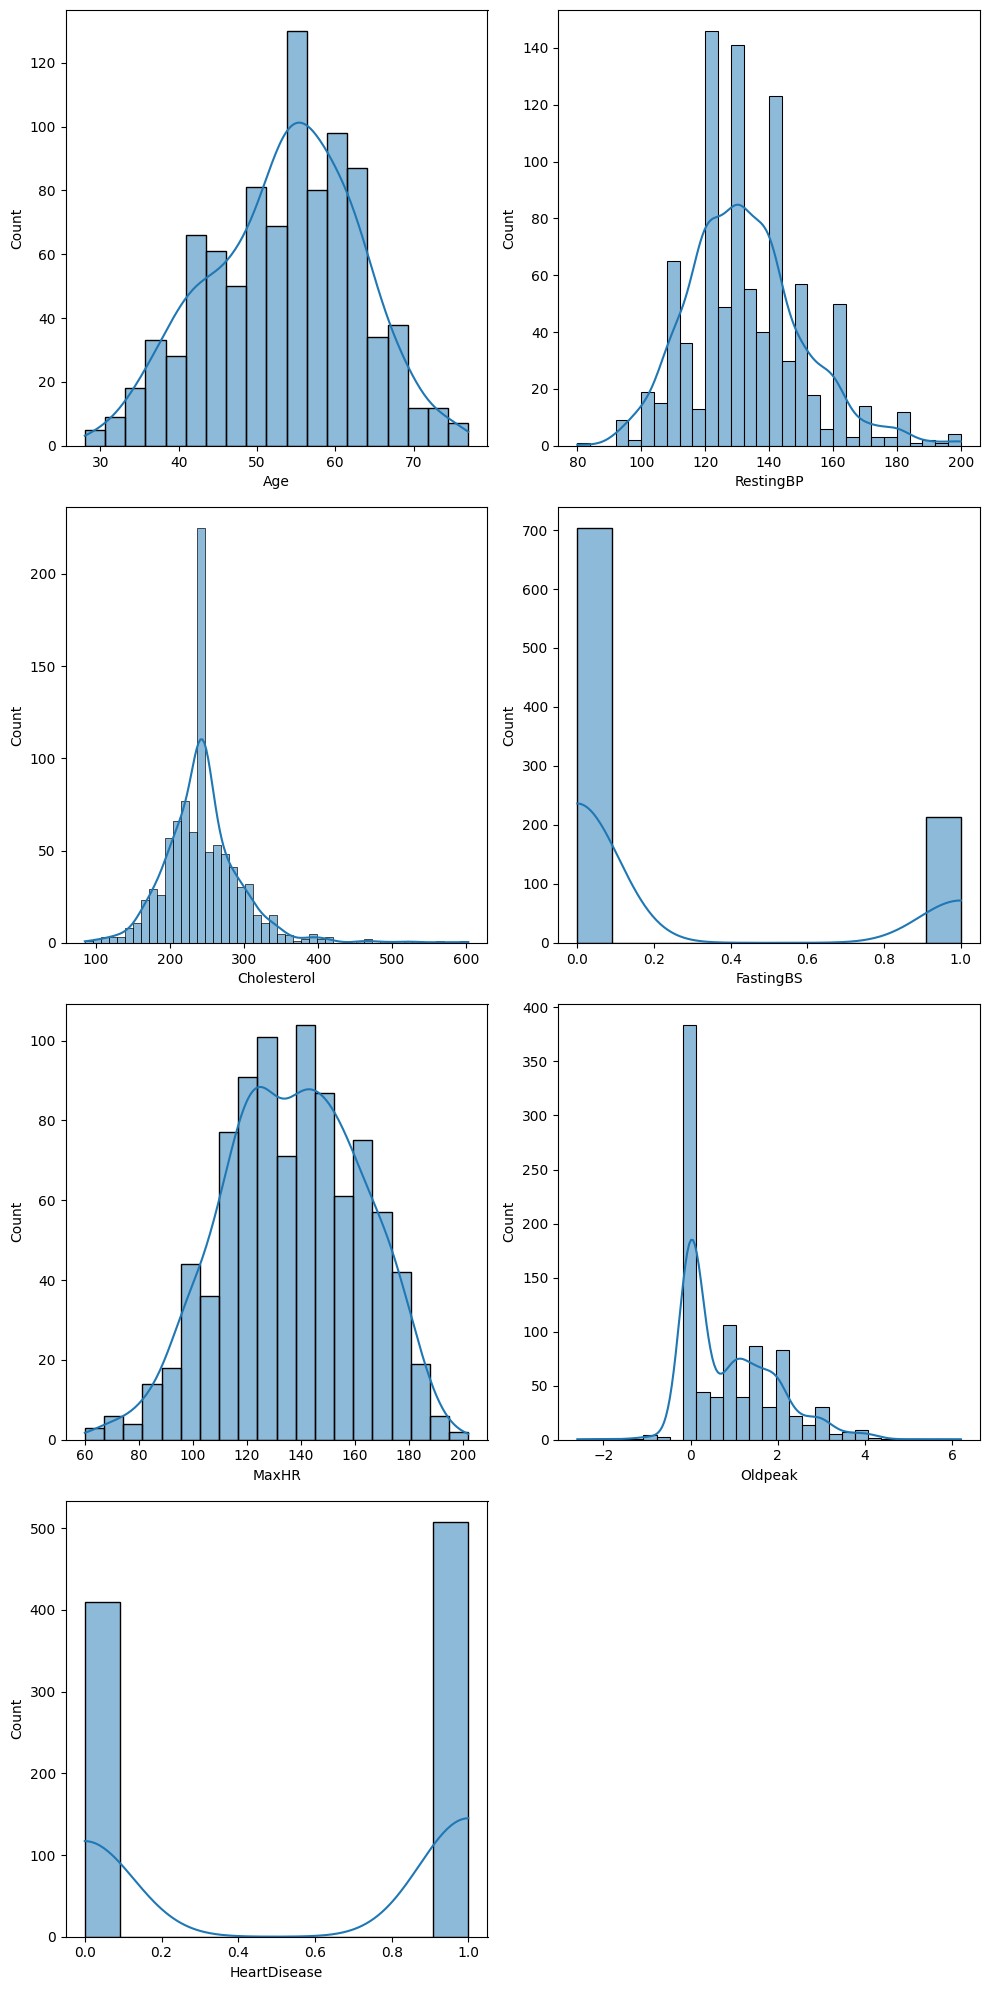

In [ ]:
plt.figure(figsize=(10,20))
for i, col in enumerate(numeric_col):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col],kde=True)
plt.tight_layout()
plt.show()

In [ ]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#For categorical data

categorical_col = df.select_dtypes(exclude=np.number).columns
categorical_col

for i in categorical_col:
   print(df[i].value_counts(),"\n")

Sex
M    725
F    193
Name: count, dtype: int64 

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64 

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64 

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64 

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64 



In [ ]:
categorical_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

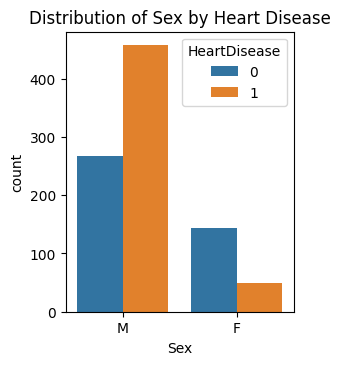

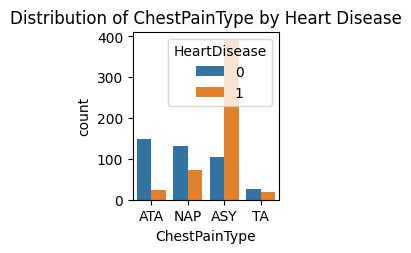

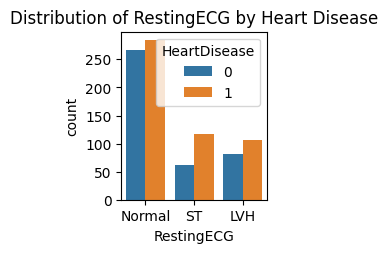

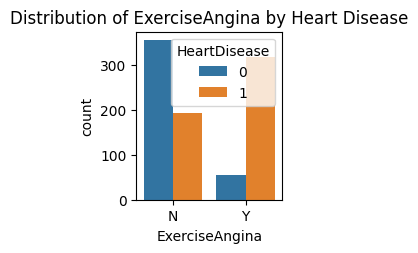

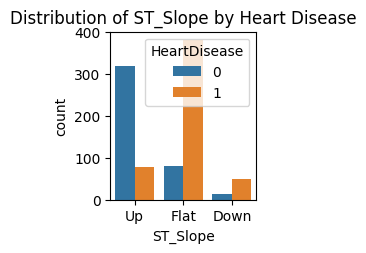

In [ ]:
plt.figure(figsize=(10,8))
for i in categorical_col:
  plt.subplot(2,3,categorical_col.get_loc(i)+1)
  sns.countplot(data=df, x=i, hue='HeartDisease')
  plt.title(f'Distribution of {i} by Heart Disease')
  plt.show()

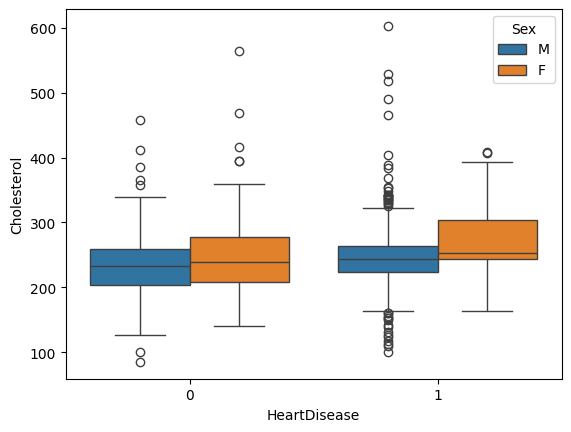

In [ ]:
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol',hue='Sex')
plt.show()

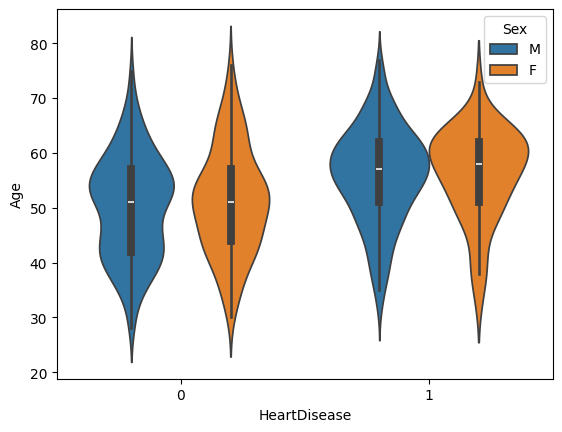

In [ ]:
sns.violinplot(data=df, x='HeartDisease', y='Age',hue='Sex')
plt.show()

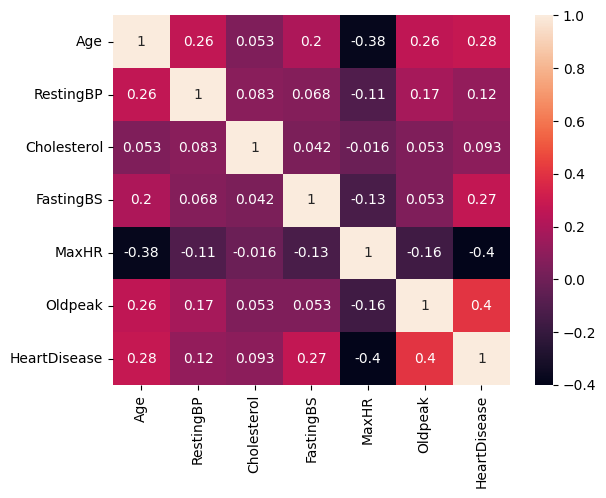

In [ ]:
# Correlation check

sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

**DATA PREPROCESSING & CLEANING**

In [ ]:
#Making bins for Resting BP

df['RestingBP_category'] = pd.cut(
    df['RestingBP'],
    bins=[0, 120, 129, 139, float('inf')],
    labels=['Normal', 'Elevated', 'Stage1_Hypertension', 'Stage2_Hypertension']
)

In [ ]:
#Making bins for

df['Cholesterol_category'] = pd.cut(
    df['Cholesterol'],
    bins=[0, 199, 299, float('inf')],
    labels=['Normal', 'Borderline', 'High']
)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_category,Cholesterol_category
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0,Stage2_Hypertension,Borderline
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1,Stage2_Hypertension,Normal
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0,Stage1_Hypertension,Borderline
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1,Stage1_Hypertension,Borderline
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0,Stage2_Hypertension,Normal


In [ ]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [ ]:
df_encoded.drop(columns=['RestingBP','Cholesterol'],inplace=True)

df_encoded

,Age,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingBP_category_Elevated,RestingBP_category_Stage1_Hypertension,RestingBP_category_Stage2_Hypertension,Cholesterol_category_Borderline,Cholesterol_category_High
0,40,0,172,0.0,0,True,True,False,False,True,False,False,False,True,False,False,True,True,False
1,49,0,156,1.0,1,False,False,True,False,True,False,False,True,False,False,False,True,False,False
2,37,0,98,0.0,0,True,True,False,False,False,True,False,False,True,False,True,False,True,False
3,48,0,108,1.5,1,False,False,False,False,True,False,True,True,False,False,True,False,True,False
4,54,0,122,0.0,0,True,False,True,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,132,1.2,1,True,False,False,True,True,False,False,True,False,False,False,False,True,False
914,68,1,141,3.4,1,True,False,False,False,True,False,False,True,False,False,False,True,False,False
915,57,0,115,1.2,1,True,False,False,False,True,False,True,True,False,False,True,False,False,False
916,57,0,174,0.0,1,False,True,False,False,False,False,False,True,False,False,True,False,True,False


In [ ]:
v=list(df_encoded.columns)
v

['Age',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'RestingBP_category_Elevated',
 'RestingBP_category_Stage1_Hypertension',
 'RestingBP_category_Stage2_Hypertension',
 'Cholesterol_category_Borderline',
 'Cholesterol_category_High']

In [ ]:
df_encoded.shape #7 more columns adde

(918, 19)

In [ ]:
df_encoded=df_encoded.astype(int)

In [ ]:
df_encoded

,Age,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingBP_category_Elevated,RestingBP_category_Stage1_Hypertension,RestingBP_category_Stage2_Hypertension,Cholesterol_category_Borderline,Cholesterol_category_High
0,40,0,172,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0
1,49,0,156,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,37,0,98,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0
3,48,0,108,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0
4,54,0,122,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,132,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0
914,68,1,141,3,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
915,57,0,115,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0
916,57,0,174,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
# numeric columns for scaling

non_bool_cols = [col for col in df_encoded.columns
                 if set(df_encoded[col].unique()) != {0, 1}]


In [ ]:
non_bool_cols

['Age', 'MaxHR', 'Oldpeak']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[non_bool_cols] = scaler.fit_transform(df_encoded[non_bool_cols])

In [ ]:
df_encoded.head()

,Age,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingBP_category_Elevated,RestingBP_category_Stage1_Hypertension,RestingBP_category_Stage2_Hypertension,Cholesterol_category_Borderline,Cholesterol_category_High
0,-1.433140,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0
1,-0.478484,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,-1.751359,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0
3,-0.584556,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0
4,0.051881,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0


**Heart disease factors**

In [ ]:
hd_factors = df_encoded.columns.drop('HeartDisease') #HeartDisease is the target value

In [ ]:
#Pearson correlation

alpha = 0.05

correlation = {
    factor: pearsonr(df_encoded[factor], df_encoded['HeartDisease'])[0]
    for factor in hd_factors
}

correlated_df = pd.DataFrame(list(correlation.items()), columns=['Factor', 'Pearson Correlation'])
correlated_df = correlated_df.sort_values(by='Pearson Correlation', ascending=False)

correlated_df

,Factor,Pearson Correlation
11,ST_Slope_Flat,0.554134
10,ExerciseAngina_Y,0.494282
3,Oldpeak,0.392385
4,Sex_M,0.305445
0,Age,0.282039
1,FastingBS,0.267291
16,Cholesterol_category_Borderline,0.122399
15,RestingBP_category_Stage2_Hypertension,0.110025
9,RestingECG_ST,0.102527
13,RestingBP_category_Elevated,0.043200


In [ ]:
cat_factors = hd_factors.drop(['Age','MaxHR','Oldpeak'])

In [ ]:
#chi2 square for categorical factors

from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05
chi2_results = {} # Initialize the dictionary

for f in cat_factors:
    contingency_table = pd.crosstab(df_encoded['HeartDisease'], df_encoded[f])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    decision = "Keep factor" if p < alpha else "Drop factor"
    chi2_results[f] = {
        "Chi2 Statistic": chi2,
        "p-value": p,
        "Decision": decision
    }

chi2_results_df = pd.DataFrame(chi2_results).T
chi2_results_df = chi2_results_df.sort_values(by='p-value')

chi2_results_df

,Chi2 Statistic,p-value,Decision
ST_Slope_Up,352.823905,0.0,Keep factor
ST_Slope_Flat,279.659914,0.0,Keep factor
ExerciseAngina_Y,222.259383,0.0,Keep factor
ChestPainType_ATA,146.236323,0.0,Keep factor
Sex_M,84.145101,0.0,Keep factor
FastingBS,64.320679,0.0,Keep factor
ChestPainType_NAP,40.608711,0.0,Keep factor
Cholesterol_category_Borderline,13.206121,0.000279,Keep factor
RestingBP_category_Stage2_Hypertension,10.655415,0.001097,Keep factor
RestingECG_ST,9.135266,0.002507,Keep factor


In [ ]:
p.item()

0.8996446009995586

In [ ]:
df1_final_heart_disease = df_encoded.drop(columns=['ChestPainType_TA'])

In [ ]:
df1_final_heart_disease

,Age,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingBP_category_Elevated,RestingBP_category_Stage1_Hypertension,RestingBP_category_Stage2_Hypertension,Cholesterol_category_Borderline,Cholesterol_category_High
0,-1.433140,0,1.382928,-0.727592,0,1,1,0,1,0,0,0,1,0,0,1,1,0
1,-0.478484,0,0.754157,0.282891,1,0,0,1,1,0,0,1,0,0,0,1,0,0
2,-1.751359,0,-1.525138,-0.727592,0,1,1,0,0,1,0,0,1,0,1,0,1,0
3,-0.584556,0,-1.132156,0.282891,1,0,0,0,1,0,1,1,0,0,1,0,1,0
4,0.051881,0,-0.581981,-0.727592,0,1,0,1,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0,-0.188999,0.282891,1,1,0,0,1,0,0,1,0,0,0,0,1,0
914,1.536902,1,0.164684,2.303858,1,1,0,0,1,0,0,1,0,0,0,1,0,0
915,0.370100,0,-0.857069,0.282891,1,1,0,0,1,0,1,1,0,0,1,0,0,0
916,0.370100,0,1.461525,-0.727592,1,0,1,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
df1_final_heart_disease.to_csv('df1_final_heart_disease.csv',index=False)

In [ ]:
df1_final_heart_disease.to_excel('df1_final_heart_disease.xlsx',index=False)